# Multimodal Data Fusion - Exercise 4 - Bayesian Inference


In this exercise, we will take a closer look at the Bayesian framework and the basics of Bayesian inference to be needed in data fusion systems. You will be learning about prior likelihood, posterior, probabilistic models, and Bayes rule as well as applying these to parameter estimation with linear regression w/o outliers.

## Learning goals 

After completion of this exercise, you should be able to

- Understand the basic elements of Bayesian inference
- Be able to apply traditional and Bayesian methods in simple parameter estimation tasks (i.e. curve fitting)
- Apply outlier robust methods to simple parameter estimation problems
  

## Relevant lecture
Lecture 5.

## Relevant Sections in course book

Chapter 9-11

## Additional Material
* Visualization and plotting with [matplotlib](https://matplotlib.org)
* Scikit-learn page on [Linear Models](https://scikit-learn.org/stable/modules/linear_model.html)
    * Linear Regression model [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
    * Bayesian Ridge model [BayesianRidge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html#sklearn.linear_model.BayesianRidge)
    * RANSAC (RANdom SAmple Consensus) algorithm [RANSACRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html#sklearn.linear_model.RANSACRegressor)

## Output Hints
Below are the output plots for each method and parameter values for relevant methods

|Tutorial|Problem 1|Problem 2|  
|:-----------------------------:|:-----------------------------:|:-----------------------------:|
| <img src="./images/Fig1.png" /> | <img src="./images/Fig2.png" /> Coefficients: [  0.          12.00090089 -35.07074983  23.44153538] | <img src="./images/Fig3.png" /> Coefficients: [ 0.83622239 -1.02159909 -1.09594268  0.13723005] |
| | |Coefficients: [ -0.11091034  11.8342979  -34.66273692  23.17045428] |

|Problem 3|Problem 4|  
|:-----------------------------:|:-----------------------------:|
| <img src="./images/Fig4.png" /> Coefficients: [ 0.         -0.85965833 -5.54688612  4.6818194 ]| <img src="./images/Fig5.png" /> |
|Coefficients: [0.99528876 -0.59443356 -0.53728453 -0.36128608]| |
|Coefficients: [ 0.99528893 -0.59443379 -0.53728462 -0.36128604]| |

| | Problem 5| |
|:-----------------------------:|:-----------------------------:|:-----------------------------:|
| <img src="./images/Fig6.png" /> | <img src="./images/Fig7.png" /> |<img src="./images/Fig8.png" /> |

# Bayesian Inference: Basics

##  Introduction

Bayesian inference is a method of statistical inference in which Bayes' theorem is used to update the probability for a hypothesis as more evidence or information becomes available.

## Questions 
Define the main premise of Bayesian inference. What are its relative advantages
and disadvantages?

The main premise of Bayesian inference is that given the a priori distribution function, likelihood function, and observed data; the posterior distribution, i.e. the distribution given the evidence, can be inferred. <br/> Integration is needed for solving this, which gets exponentially heavy to compute with increasing number of parameters. This can be solved with Markov Chain Monte Carlo methods, which discretize the functions to make an approximation of the integration. 

# Parameter estimation: curve fitting

<a id='KmeansDemo'></a>
<div class=" alert alert-info">
    <b>Tutorial.</b> Generate sinusoidal data with noise and bias

The code below defines a function for generating sinusoidal data with noise and generate random data points for x-axis and y-axis. Complete and run the code below to visualize the data.
<p>1) Define our sinusoidal function </p>
<p>2) Generate "size" number of uniform random data points in the range of 0. and 1. for x-axis </p>
<p>3) Generate "size" number of random data points from standard normal distribution for y-axis </p>
<p>4) Make a deep copy and add outlier bias to 5 samples </p>
<p>5) Define linearly spaced vector with 100 points in the range of 0. to 1. </p>
<p>6) Plot data point without and with outliers (vectors "x" and "y/y2") </p>

</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from scipy import stats # remove if not needed?!

Answer to this block will be provided during exercise session

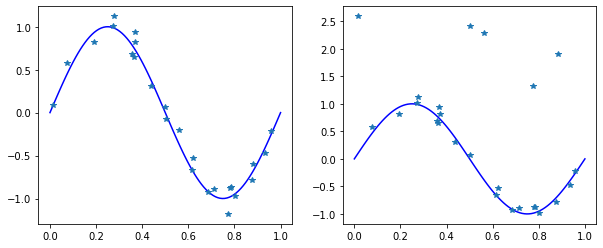

In [2]:
def func(x): return np.sin(2*np.pi*x)

size = 25

rng = np.random.RandomState(1234)
x = rng.uniform(0,1, size)
# print(x)

y = rng.normal(0,0.1,size) #std has to be 0.1 instead of 1 to match the plots of hints
# print(y)
y = func(x) + y

bias = 2.5
y2 = y.copy()
# print(y2[15:20])
y2[15:20] = y2[15:20] + bias
# print(y2[15:20])
xt = np.linspace(0, 1, 100)
f = plt.figure(figsize=(10,4))
f.add_subplot(1,2,1)
plt.plot(xt, func(xt), 'b')
plt.plot(x, y, '*')

f.add_subplot(1,2,2)
plt.plot(xt, func(xt), 'b')
plt.plot(x, y2, '*')
plt.show()

## Linear regression

<a id='Task1.1'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 1

<p> Complete the code below to build and fit a linear regression model for curve fitting on sinusoidal data with noise. </p>
    
<p>1) Generate "PolynomialFeatures()" of "n_order" and fit the model to data (Hint: fit_transform())</p>
<p>2) Fit linear regression object with "X" and "y"</p>
<p>3) Print fitted linear regression model's coefficients</p>
<p>4) Predict the labels using fitted linear regression model for "Xt"</p>
<p>5) Plot data points and obtained linear regression curve</p>

</div>

Coefficients: [[  0.          12.00090089 -35.07074983  23.44153538]]


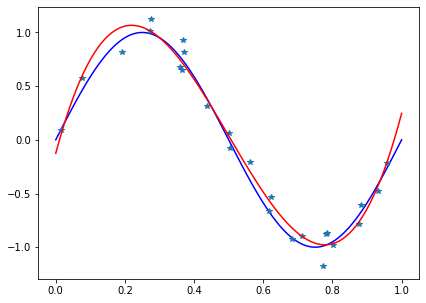

In [3]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

## == Create linear regression object == ##
lreg = linear_model.LinearRegression()
n_order = 3

# Generate "PolynomialFeatures()" of "n_order" and fit the model to data (Hint: fit_transform())
polyfeat = PolynomialFeatures(n_order)
X = polyfeat.fit_transform(x.reshape(-1, 1)) #X is a table with rows of 1,x,x^2,x^3 for each x
Xt = polyfeat.fit_transform(xt.reshape(-1, 1)) #same for xt

# Fit linear regression object with "X" and "y"
lreg.fit(X, y.reshape(-1, 1)) #lreg fits coefficients for every row of X and y with the equation 
                                #y = a1 + bx + cx^2 + dx^3 so that residual sum of squares (rss) is minimized

# Print fitted linear regression model's coefficients 
print('Coefficients:', lreg.coef_)

# Predict the labels using fitted linear regression model for "Xt"
ypred = lreg.predict(Xt) #lreg predicts values of y using Xt


f = plt.figure(figsize=(15,5))
f.add_subplot(1,2,1)
plt.plot(xt, func(xt), 'b')

# Plot data point with symbol '*'
plt.plot(x, y, '*')

# Plot obtained linear regression curve with 'r'
plt.plot(xt, ypred, 'r')
plt.show()

## Bayesian linear regression

<a id='Task1.2'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 2

<p> Complete the code below to build and fit a bayesian ridge regression model for curve fitting on sinusoidal data with noise.</p>
    
<p>1) Fit bayesian linear regression object with "X" and "y" and print coefficients</p>
<p>2) Predict the labels using fitted bayesian linear regression model for "Xt" and also return the standard deviation</p>
<p>3) Plot data point and obtained bayesian linear regression curve with 95% confidence interval</p>
<p>4) Repeat step 1 to 3 with new fitted bayesian linear regression model</p>
    
Note: Plot in red shaded are the 95% confidence interval corresponding to $\pm 2$ standard deviations above mean.


</div>

First coeffs:  [ 0.83622239 -1.02159909 -1.09594268  0.13723005]
Second coeffs:  [ -0.11091034  11.8342979  -34.66273692  23.17045428]


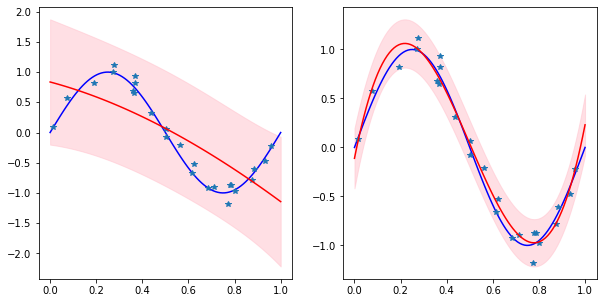

In [4]:
## == Create bayesian linear regression object == ##
breg = linear_model.BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)

f = plt.figure(figsize=(10,5))

# Fit bayesian linear regression object with "X" and "y" and print coefficients
breg.fit(X, y)
print("First coeffs: ",breg.coef_)

# Predict the labels using fitted bayesian linear regression model for "Xt" and also return the standard deviation
ypred, ystd = breg.predict(Xt, True)


# # First subplot
f.add_subplot(1,2,1)
plt.plot(xt, func(xt), 'b')

# # Plot data point with symbol '*'
plt.plot(x,y,'*')

# # Plot obtained bayesian linear regression curve with 'r'
plt.plot(xt,ypred,'r')

plt.fill_between(xt, ypred-(2*ystd), ypred+(2*ystd), # mean -+ 2 stds
                    color="pink", alpha=0.5, label="predict std")

# # Set new parameters for the bayesian linear regression object
breg.set_params(alpha_init=1., lambda_init= 1e-3) 
# # Updating the initial value for alpha (precision of the noise) and 
# # initial value for lambda (precision of the weights)

# # Perform the steps from 1 to 3 again with new fitted bayesian linear regression model

# Fit new bayesian linear regression object with "X" and "y" and print coefficients
breg.fit(X, y)
print("Second coeffs: ",breg.coef_)

# Predict the labels using the new fitted bayesian linear regression model for "Xt" and also return the standard deviation
ypred_new, ystd_new = breg.predict(Xt, True)
# # Second subplot
f.add_subplot(1,2,2)
plt.plot(xt, func(xt), 'b')

# # Plot data point with symbol '*'
plt.plot(x,y,'*')

# # Plot obtained bayesian linear regression curve with 'r'
plt.plot(xt,ypred_new,'r')

plt.fill_between(xt, ypred_new-(2*ystd_new), ypred_new+(2*ystd_new), # mean -+ 2 stds
                    color="pink", alpha=0.5, label="predict std")
plt.show()

# Robust parameter estimation: curve fitting

## Linear regression and Bayesian linear regression

<a id='Task2.1'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 3

<p> Complete the code below to build and fit linear and bayesian linear regression models for curve fitting on sinusoidal data with noise and bias</p>

<p>1) Repeat all the steps from problem 1 and 2 but this time using 'y2' (data with outliers defined in tutorial)</p>
<p>2) Compare all the results from Problem 1, 2, and 3. Explain your reasoning why models behave differently?</p>


</div>

Coefficients: [[ 0.         -0.85965833 -5.54688612  4.6818194 ]]
First coeffs:  [ 0.99528876 -0.59443356 -0.53728453 -0.36128608]
Second coeffs:  [ 0.99528893 -0.59443379 -0.53728462 -0.36128604]


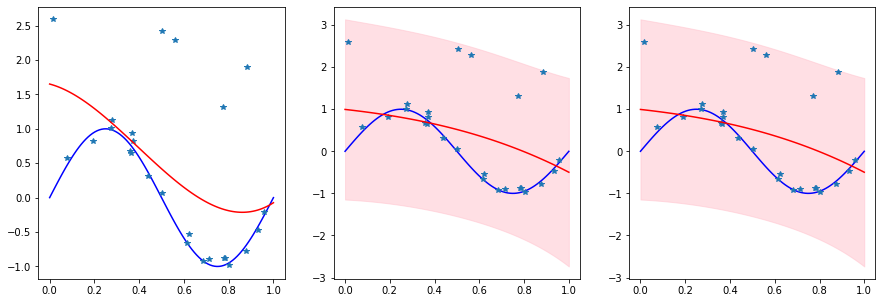

In [21]:
## == Create linear regression object == ##
lreg = linear_model.LinearRegression()
n_order = 3

# Generate "PolynomialFeatures()" of "n_order" and fit the model to data (Hint: fit_transform())
polyfeat = PolynomialFeatures(n_order)
X = polyfeat.fit_transform(x.reshape(-1, 1)) #X is a table with rows of 1,x,x^2,x^3 for each x
Xt = polyfeat.fit_transform(xt.reshape(-1, 1)) #same for xt

# Fit linear regression object with "X" and "y"
lreg.fit(X, y2.reshape(-1, 1)) #lreg fits coefficients for every row of X and y with the equation 
                                #y = a1 + bx + cx^2 + dx^3 so that residual sum of squares (rss) is minimized

# Print fitted linear regression model's coefficients 
print('Coefficients:', lreg.coef_)

# Predict the labels using fitted linear regression model for "Xt"
ypred_lin = lreg.predict(Xt) #lreg predicts values of y using Xt


f = plt.figure(figsize=(15,5))
f.add_subplot(1,3,1)
plt.plot(xt, func(xt), 'b')

# Plot data point with symbol '*'
plt.plot(x, y2, '*')

# Plot obtained linear regression curve with 'r'
plt.plot(xt, ypred_lin, 'r')


########################################################################################################################

breg = linear_model.BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)

breg.fit(X, y2)
print("First coeffs: ",breg.coef_)

# Predict the labels using fitted bayesian linear regression model for "Xt" and also return the standard deviation
ypred_bayes, ystd_bayes = breg.predict(Xt, True)


# # First subplot
f.add_subplot(1,3,2)
plt.plot(xt, func(xt), 'b')

# # Plot data point with symbol '*'
plt.plot(x,y2,'*')

# # Plot obtained bayesian linear regression curve with 'r'
plt.plot(xt,ypred_bayes,'r')

plt.fill_between(xt, ypred_bayes-(2*ystd_bayes), ypred_bayes+(2*ystd_bayes), # mean -+ 2 stds
                    color="pink", alpha=0.5, label="predict std")

# # Set new parameters for the bayesian linear regression object
breg.set_params(alpha_init=1., lambda_init= 1e-3)
# # Updating the initial value for alpha (precision of the noise) and 
# # initial value for lambda (precision of the weights)

# # Perform the steps from 1 to 3 again with new fitted bayesian linear regression model

# Fit new bayesian linear regression object with "X" and "y" and print coefficients
breg.fit(X, y2)
print("Second coeffs: ",breg.coef_)

# Predict the labels using the new fitted bayesian linear regression model for "Xt" and also return the standard deviation
ypred_bayes_new, ystd_bayes_new = breg.predict(Xt, True)
# # Second subplot
# f = plt.figure(figsize=(10,5))
f.add_subplot(1,3,3)
plt.plot(xt, func(xt), 'b')

# # Plot data point with symbol '*'
plt.plot(x,y2,'*')

# # Plot obtained bayesian linear regression curve with 'r'
plt.plot(xt,ypred_bayes_new,'r')

plt.fill_between(xt, ypred_bayes_new-(2*ystd_bayes_new), ypred_bayes_new+(2*ystd_bayes_new), # mean -+ 2 stds
                    color="pink", alpha=0.5, label="predict std")
plt.show()

#### In the linear regression model, since the bias is a positive constant, the whole fit trends slighty towards positive infinity. On top of this, the fit looses some of its shape.

## RANSAC

<a id='Task2.2'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 4

<p> Complete the code below to build and fit a RANSAC model for curve fitting on sinusoidal data with noise and bias</p>
<p>2) Fit RANSAC model with "X" and "y2"</p>
<p>3) Print fitted RANSAC model's coefficients</p>
<p>4) Predict the labels using fitted RANSAC model for "Xt"</p>
<p>5) Plot data points and obtained curve</p>
<p>6) Compare this results with Problem 3. Explain your reasoning why models behave differently?</p>

</div>

Coefs:  [  0.          12.54234909 -35.78094661  23.69190502]


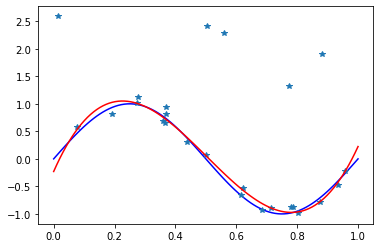

In [52]:
## == Create linear regression object using RANSACRegressor== #

ransac = linear_model.RANSACRegressor()
ransac.fit(X,y2)
print("Coefs: ",ransac.estimator_.coef_)
pred_ransac = ransac.predict(Xt)

plt.plot(xt, func(xt), 'b')

# # Plot data point with symbol '*'
plt.plot(x,y2,'*')

# # Plot obtained bayesian linear regression curve with 'r'
plt.plot(xt,pred_ransac,'r')
plt.show()

#### RANSAC is robust against outliers, simply put. It strives for eliminating the outliers.

## Gaussian Mixture Model

<a id='Task2.1'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 5

<p>Consider the data from file gmm_data.csv. 

1) Prepare scatter plot of the data where you plot the second column against the first column. 
    
2) Perform K-means clustering on data points: fit model to data and predict the cluster labels of data points. Prepare a scatter plot of data points with different colors indicating different cluster labels. 
 
3) Apply Gaussian Mixture Model with parameter covariance_type = 'full' and random_state = 100; again fit model with data and predict cluster labels. Plot data points with different colors corresponding to cluster labels. Use GMM to predict also cluster labels' posterior probabilities. 

4) Compare K means and GMM; what is their principal difference? How their outputs differ here and what might be the reason for it? </p>

</div>

min likelihood of picked label:  0.9439298793868668
max likelihood of picked label:  1.0
mean likelihood of picked label:  0.9985684312364248


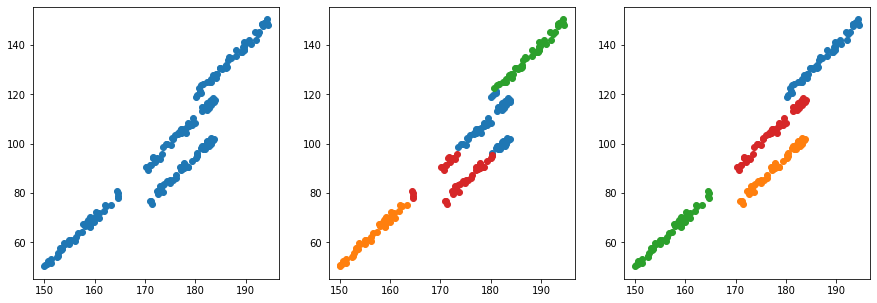

In [61]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

gmm_data = np.genfromtxt('gmm_data.csv', delimiter=',') # read from CSV file
# print(gmm_data)

#k-means clustering
kmeans = KMeans(4)
kmeans.fit(gmm_data)
kmeans_preds = kmeans.predict(gmm_data)
cluster0 = gmm_data[np.where(kmeans_preds == 0)]
cluster1 = gmm_data[np.where(kmeans_preds == 1)]
cluster2 = gmm_data[np.where(kmeans_preds == 2)]
cluster3 = gmm_data[np.where(kmeans_preds == 3)]


#gaussian mixture model
gmm = GaussianMixture(n_components = 4 ,covariance_type = 'tied', random_state = 100) #using covariace_type of 
                                                                        #'full' did not yied the same results as in the picture
                                                                        #'tied' seems to work as intended.
gmm_preds = gmm.fit_predict(gmm_data)
gmm_cluster0 = gmm_data[np.where(gmm_preds == 0)]
gmm_cluster1 = gmm_data[np.where(gmm_preds == 1)]
gmm_cluster2 = gmm_data[np.where(gmm_preds == 2)]
gmm_cluster3 = gmm_data[np.where(gmm_preds == 3)]

post_probs = gmm.predict_proba(gmm_data)
max_prob = [max(prob_point) for prob_point in post_probs] #maximum posterior probability of a point belonging to a cluster 
                                                          #for each point. i.e. the likelyhood of each picked label
    
print("min likelihood of picked label: ", min([max(prob_point) for prob_point in post_probs])) #the least likely of maximums
print("max likelihood of picked label: ", max([max(prob_point) for prob_point in post_probs])) #the most likely of maximums
print("mean likelihood of picked label: ", np.mean(max_prob))                                  #mean of maximums

#plots
f = plt.figure(figsize=(15,5))
f.add_subplot(1,3,1)
plt.scatter(gmm_data[:,0], gmm_data[:,1])
f.add_subplot(1,3,2)
plt.scatter(cluster0[:,0], cluster0[:,1])
plt.scatter(cluster1[:,0], cluster1[:,1])
plt.scatter(cluster2[:,0], cluster2[:,1])
plt.scatter(cluster3[:,0], cluster3[:,1])
f.add_subplot(1,3,3)
plt.scatter(gmm_cluster0[:,0], gmm_cluster0[:,1])
plt.scatter(gmm_cluster1[:,0], gmm_cluster1[:,1])
plt.scatter(gmm_cluster2[:,0], gmm_cluster2[:,1])
plt.scatter(gmm_cluster3[:,0], gmm_cluster3[:,1])
plt.show()

#### GMM perfoms better than k-means in labeling the clusters <br/>K-means assumes that clusters are spherical in shape. Mixture models are used for modeling subpopulations within a population. In this case the subpopulations are the clusters. GMM allows for gaussian noise to exist in the data as well.